In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
TARGET_COL_NAME = "Expert Diagnose"

In [38]:
cache_dir = "~/.cache/kagglehub/datasets/mdsultanulislamovi/mental-disorders-dataset/versions/1"
dataset = pd.read_csv(cache_dir + "/mental_disorders_dataset_encoded.csv")
dataset.drop(columns="Patient Number", inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Mood Swing                  120 non-null    int64 
 1   Suicidal thoughts           120 non-null    int64 
 2   Anorxia                     120 non-null    int64 
 3   Authority Respect           120 non-null    int64 
 4   Try-Explanation             120 non-null    int64 
 5   Aggressive Response         120 non-null    int64 
 6   Ignore & Move-On            120 non-null    int64 
 7   Nervous Break-down          120 non-null    int64 
 8   Admit Mistakes              120 non-null    int64 
 9   Overthinking                120 non-null    int64 
 10  Sexual Activity             120 non-null    int64 
 11  Concentration               120 non-null    int64 
 12  Optimisim                   120 non-null    int64 
 13  Expert Diagnose             120 non-null    object

In [39]:
X = dataset[dataset.columns.drop(TARGET_COL_NAME)]
y = dataset[TARGET_COL_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 29), (90,), (30, 29), (30,))

In [40]:
# Just a quick check of the dataset meaningfulness
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8

In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

/home/dom/GitRepos/ML-project/.venv/lib64/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Mood Swing,1.593302
1,Suicidal thoughts,1.289468
2,Anorxia,1.339428
3,Authority Respect,1.511874
4,Try-Explanation,1.245248
5,Aggressive Response,1.531859
6,Ignore & Move-On,1.479008
7,Nervous Break-down,1.332131
8,Admit Mistakes,1.196123
9,Overthinking,1.238039


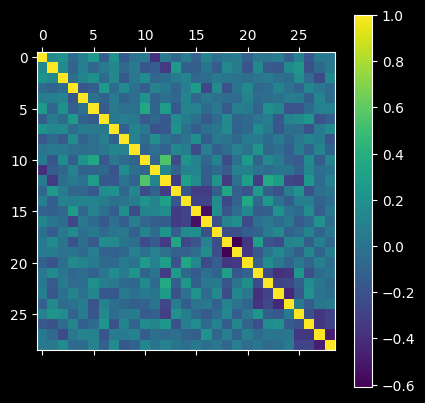

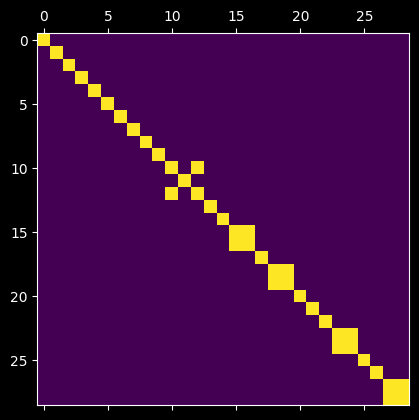

In [68]:
plt.matshow(X.corr())
plt.colorbar()

plt.matshow(X.corr().abs() >= 0.4)
plt.show()